In [216]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [217]:
# Configuración de estilos y tema
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 12})

In [218]:
# Ruta al archivo JSON del historial de streaming
streaming_history_json_path = './spotifydata/Streaming_History_Audio_2023-2024_2.json'

# Cargar el historial de streaming desde JSON
with open(streaming_history_json_path, 'r', encoding='utf-8') as f:
    streaming_data = json.load(f)

# Convertir el historial de streaming a DataFrame
df = pd.json_normalize(streaming_data)


In [219]:

# Renombrar columnas a español y mayor claridad
df.rename(columns={
    'ts': 'marca_tiempo',
    'master_metadata_track_name': 'nombre_cancion',
    'master_metadata_album_artist_name': 'artista',
    'master_metadata_album_album_name': 'album',
    'spotify_track_uri': 'uri_cancion',
    'ms_played': 'duracion_ms',
    'platform': 'plataforma',
    'conn_country': 'pais_conexion',
    'ip_addr': 'direccion_ip',
    'reason_start': 'motivo_inicio',
    'reason_end': 'motivo_fin',
    'shuffle': 'modo_aleatorio',
    'skipped': 'saltada',
    'offline': 'modo_offline',
    'offline_timestamp': 'marca_tiempo_offline',
    'incognito_mode': 'modo_incognito'
}, inplace=True)

# Seleccionar y reorganizar columnas relevantes
df = df[[
    'marca_tiempo', 'plataforma', 'duracion_ms', 'pais_conexion',
    'nombre_cancion', 'artista', 'album', 'uri_cancion',
    'motivo_inicio', 'motivo_fin', 'modo_aleatorio', 'saltada',
    'modo_offline', 'marca_tiempo_offline', 'modo_incognito'
]]

# Convertir 'marca_tiempo' a datetime
df['marca_tiempo'] = pd.to_datetime(df['marca_tiempo'], errors='coerce')

# Convertir 'duracion_ms' a segundos
df['duracion_segundos'] = df['duracion_ms'].apply(lambda x: round(x / 1000) if pd.notnull(x) else np.nan)
df.drop('duracion_ms', axis=1, inplace=True)


In [220]:
print("Primeras filas del DataFrame de streaming:")
df.head()

print("\nInformación del DataFrame de streaming:")
df.info()

Primeras filas del DataFrame de streaming:

Información del DataFrame de streaming:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   marca_tiempo          11249 non-null  datetime64[ns, UTC]
 1   plataforma            11249 non-null  object             
 2   pais_conexion         11249 non-null  object             
 3   nombre_cancion        11222 non-null  object             
 4   artista               11222 non-null  object             
 5   album                 11222 non-null  object             
 6   uri_cancion           11222 non-null  object             
 7   motivo_inicio         11249 non-null  object             
 8   motivo_fin            11249 non-null  object             
 9   modo_aleatorio        11249 non-null  bool               
 10  saltada               11249 non-null  bool    

In [221]:
# Eliminar columnas no utilizadas
columnas_eliminar = ['direccion_ip', 'marca_tiempo_offline']
df.drop(columns=columnas_eliminar, inplace=True, errors='ignore')

In [222]:
# --- Análisis Exploratorio de Datos Avanzado ---
print("\nDescripción estadística del DataFrame de streaming:")
df.describe(include='all').transpose()


Descripción estadística del DataFrame de streaming:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
marca_tiempo,11249,NaN,NaN,NaN,2024-05-24 19:02:58.370877696+00:00,2023-12-01 16:18:53+00:00,2024-03-07 09:18:48+00:00,2024-05-08 07:22:20+00:00,2024-07-24 17:02:26+00:00,2024-12-06 23:59:10+00:00,NaN
plataforma,11249,4,android,10413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais_conexion,11249,4,ES,11182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre_cancion,11222,1172,LUNA,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artista,11222,328,SAIKO,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album,11222,758,SAKURA,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uri_cancion,11222,1251,spotify:track:3tjNL1Y42bRA6jHeQhjgkO,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motivo_inicio,11249,9,trackdone,6952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motivo_fin,11249,8,trackdone,6857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modo_aleatorio,11249,2,True,8275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# Asegurarse de que la columna 'anio' esté presente
if 'anio' not in df.columns:
    df['anio'] = df['marca_tiempo'].dt.year

# Agrupar por año y sumar la duración en segundos
minutos_por_anio = df.groupby('anio')['duracion_segundos'].sum().reset_index()

# Convertir segundos a minutos
minutos_por_anio['duracion_minutos'] = minutos_por_anio['duracion_segundos'] / 60

# Verificar si hay más de un año en los datos
if len(minutos_por_anio) > 1:
    # Mostrar el resultado para varios años
    print(minutos_por_anio[['anio', 'duracion_minutos']])
else:
    # Mostrar el resultado para un solo año
    unico_anio = minutos_por_anio.iloc[0]
    print(f"Año: {unico_anio['anio']}, Duración en minutos: {unico_anio['duracion_minutos']:.2f}")

   anio  duracion_minutos
0  2023           1679.15
1  2024          25637.25


In [224]:

# 1. Métricas por Canción
stats_canciones = df.groupby(['nombre_cancion', 'artista'], as_index=False).agg(
    reproducciones=('uri_cancion', 'count'),
    duracion_total_seg=('duracion_segundos', 'sum')
)
stats_canciones['duracion_total_min'] = round(stats_canciones['duracion_total_seg'] / 60, 2)
stats_canciones.sort_values('reproducciones', ascending=False, inplace=True)
print("Top 30 canciones más reproducidas:")
stats_canciones.head(30)



Top 30 canciones más reproducidas:


,nombre_cancion,artista,reproducciones,duracion_total_seg,duracion_total_min
164,COMETA HALLEY,SAIKO,92,16568,276.13
1077,Universitaria,Quevedo,83,9253,154.22
861,REINA,Mora,70,11268,187.80
516,LUNA,Feid,70,11155,185.92
1182,Ódiame,SAIKO,68,7000,116.67
1151,lady madrizZz,céro,68,6800,113.33
167,COMO SUENAN LAS ESTRELLAS,SAIKO,68,8139,135.65
504,LA ÚLTIMA,Quevedo,67,8632,143.87
1136,algo así (remix),paopao,65,11180,186.33
1064,Un Rodeoooo,Rels B,64,7152,119.20


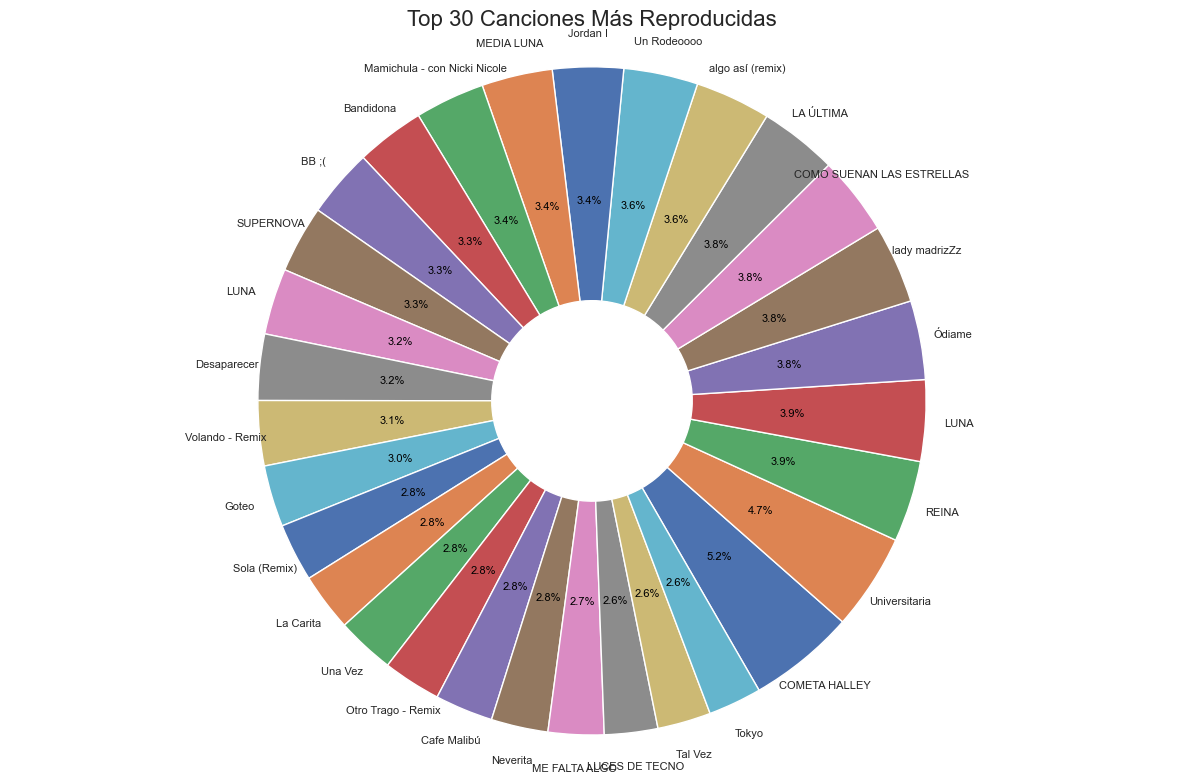

In [225]:
# Plot de las 30 canciones más reproducidas en formato donut
top_30_canciones = stats_canciones.head(30)
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    top_30_canciones['reproducciones'], 
    labels=top_30_canciones['nombre_cancion'], 
    autopct='%1.1f%%', 
    startangle=300, 
    wedgeprops=dict(width=0.7),
    textprops=dict(size='small')
)
plt.setp(texts, size=8, ha='center', rotation_mode='anchor')  # Ajustar tamaño, alineación y modo de rotación de los textos de las etiquetas
plt.setp(autotexts, size=8, color='black')  # Ajustar tamaño y color de los textos de los porcentajes
plt.title('Top 30 Canciones Más Reproducidas', fontsize=16)
plt.axis('equal')  # Para asegurar que el gráfico de donut sea circular
plt.tight_layout()
plt.show()

In [226]:

# 2. Métricas por Artista
stats_artistas = df.groupby('artista', as_index=False).agg(
    reproducciones=('uri_cancion', 'count'),
    duracion_total_seg=('duracion_segundos', 'sum')
)
stats_artistas['duracion_total_min'] = round(stats_artistas['duracion_total_seg'] / 60, 2)
stats_artistas.sort_values('reproducciones', ascending=False, inplace=True)

print("\nTop 30 artistas más reproducidos:")
stats_artistas.head(30)



Top 30 artistas más reproducidos:


,artista,reproducciones,duracion_total_seg,duracion_total_min
270,SAIKO,1044,154125,2568.75
250,Quevedo,982,138812,2313.53
26,Bad Bunny,969,145842,2430.70
211,Mora,926,136048,2267.47
259,Rels B,597,71975,1199.58
109,Feid,588,85565,1426.08
137,Jay Wheeler,352,53629,893.82
88,Duki,234,32337,538.95
216,Myke Towers,203,32725,545.42
61,Cruz Cafuné,197,29049,484.15


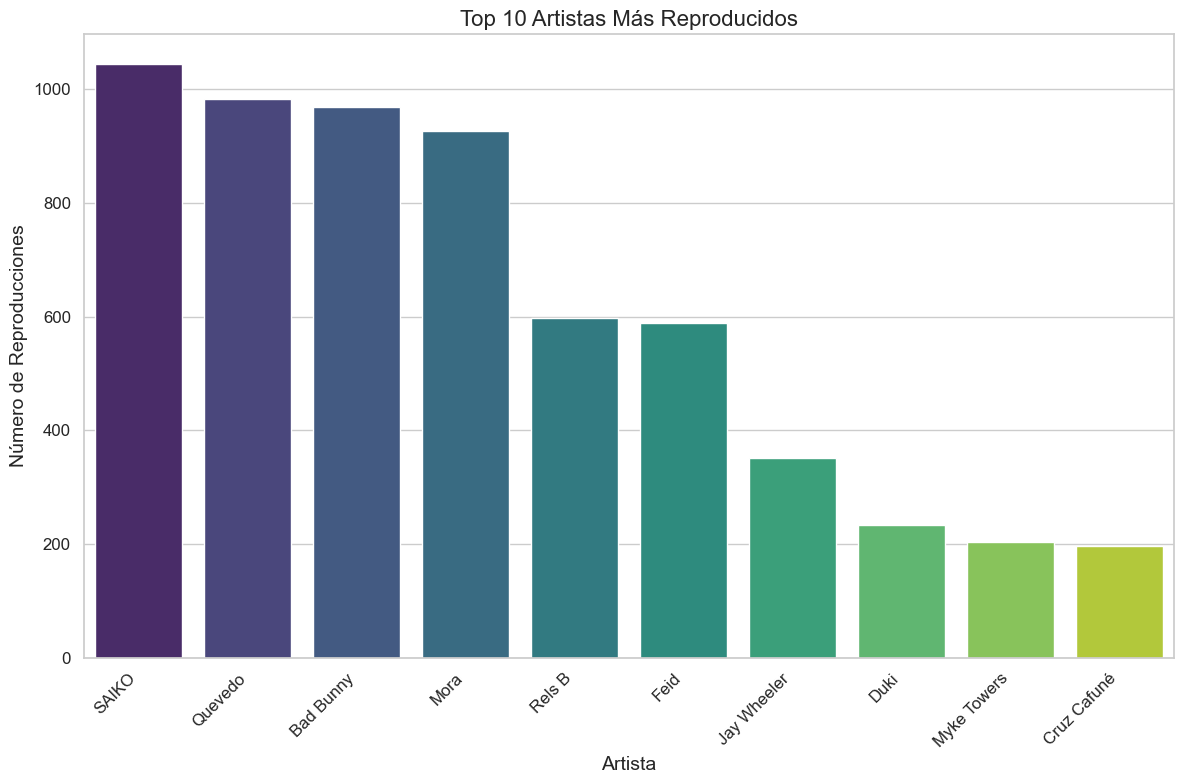

In [227]:
# Plot de los 10 artistas más reproducidos en vertical
top_10_artistas = stats_artistas.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_artistas, x='artista', y='reproducciones', hue='artista', palette='viridis', legend=False)
plt.title('Top 10 Artistas Más Reproducidos', fontsize=16)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Número de Reproducciones', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [228]:
# 3. Métricas por Álbum
stats_albums = df.groupby(['album', 'artista'], as_index=False).agg(
    reproducciones=('uri_cancion', 'count'),
    duracion_total_seg=('duracion_segundos', 'sum')
)
stats_albums['duracion_total_min'] = round(stats_albums['duracion_total_seg'] / 60, 2)
stats_albums.sort_values('reproducciones', ascending=False, inplace=True)

print("\nTop 10 álbumes más reproducidos:")
stats_albums.head(10)




Top 10 álbumes más reproducidos:


,album,artista,reproducciones,duracion_total_seg,duracion_total_min
566,SAKURA,SAIKO,505,74936,1248.93
73,BUENAS NOCHES,Quevedo,402,56768,946.13
687,Un Verano Sin Ti,Bad Bunny,387,58922,982.03
398,MICRODOSIS,Mora,256,34848,580.80
529,Primer Dia de Clases,Mora,229,34023,567.05
722,YHLQMDLG,Bad Bunny,224,30808,513.47
208,ESTRELLA,Mora,222,29697,494.95
445,Música Buena Para Días Malos,Jay Wheeler,214,30974,516.23
731,a new star (1 9 9 3),Rels B,209,23216,386.93
156,DONDE QUIERO ESTAR,Quevedo,208,30791,513.18


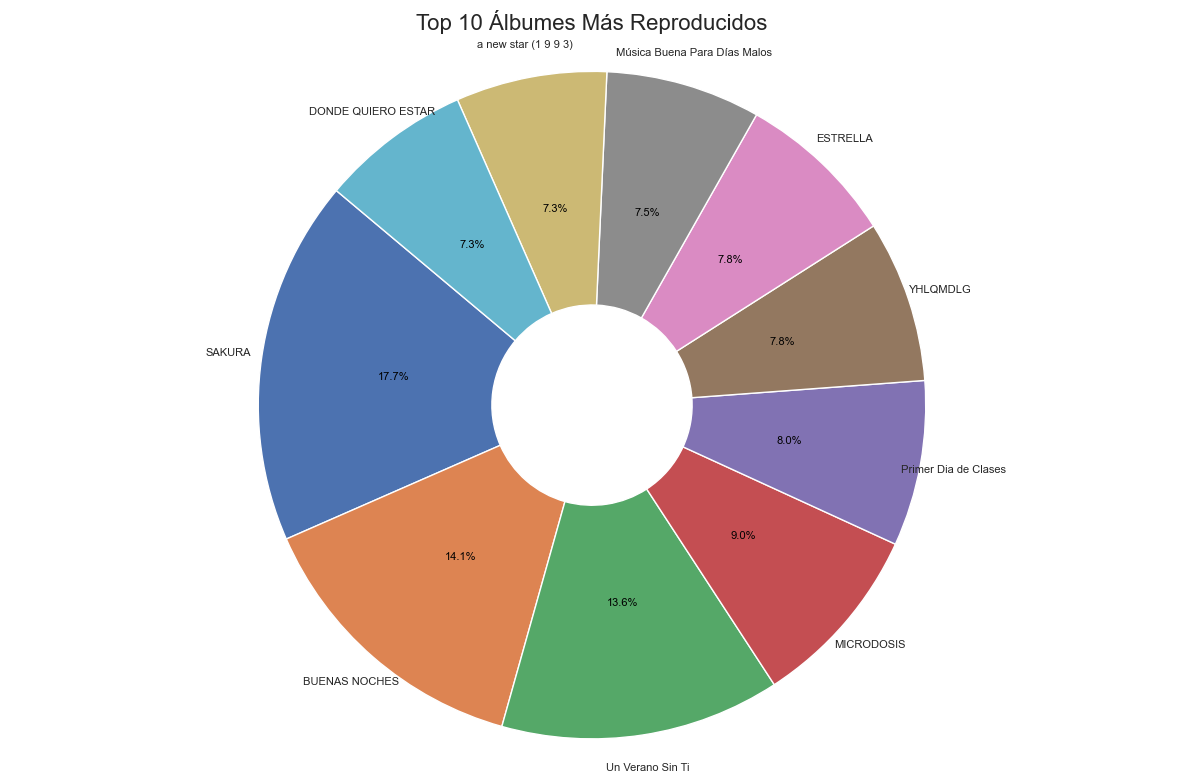

In [229]:
# Plot de los 10 álbumes más reproducidos en formato donut
top_10_albums = stats_albums.head(10)
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    top_10_albums['reproducciones'], 
    labels=top_10_albums['album'], 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops=dict(width=0.7),
    textprops=dict(size='small')
)
plt.setp(texts, size=8, ha='center', rotation_mode='anchor')  # Ajustar tamaño, alineación y modo de rotación de los textos de las etiquetas
plt.setp(autotexts, size=8, color='black')  # Ajustar tamaño y color de los textos de los porcentajes
plt.title('Top 10 Álbumes Más Reproducidos', fontsize=16)
plt.axis('equal')  # Para asegurar que el gráfico de donut sea circular
plt.tight_layout()
plt.show()

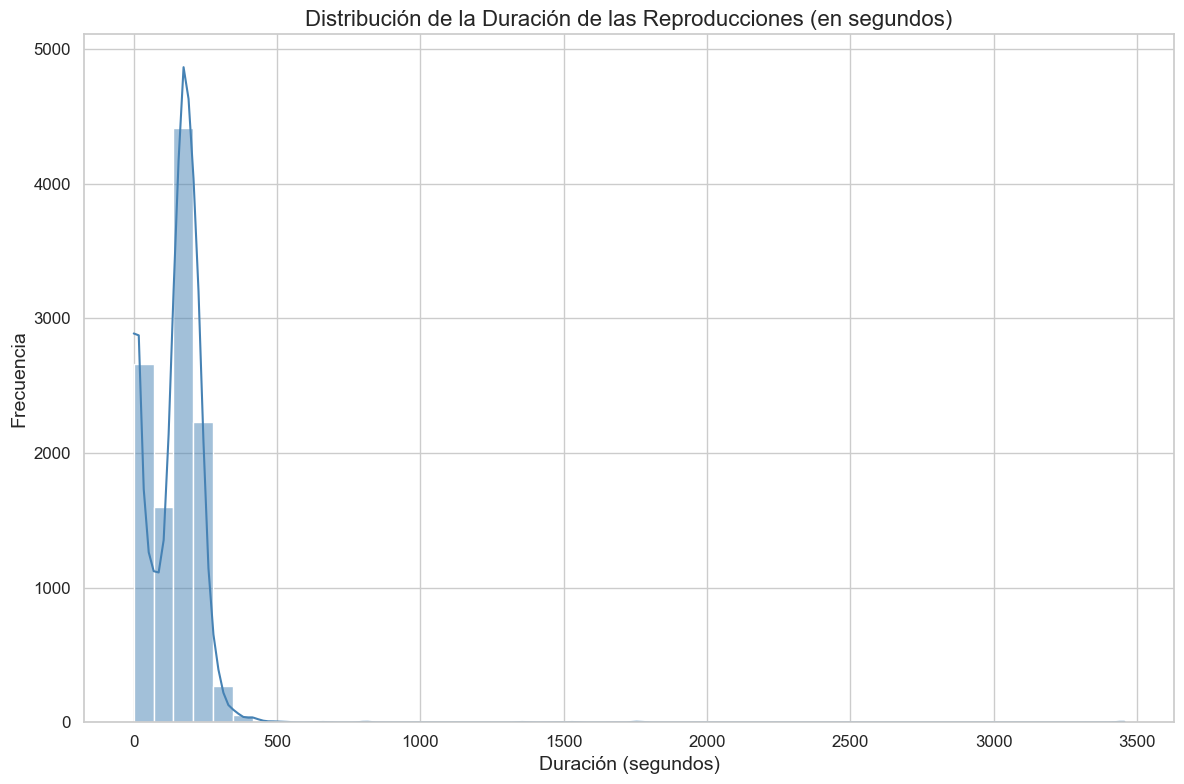

In [230]:
# 4. Distribución de la duración de las reproducciones
plt.figure(figsize=(12, 8))
sns.histplot(df['duracion_segundos'].dropna(), bins=50, kde=True, color='steelblue')
plt.title('Distribución de la Duración de las Reproducciones (en segundos)', fontsize=16)
plt.xlabel('Duración (segundos)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()

In [231]:

# 5. Reproducciones por Mes (sin espacio entre meses)
# Extraer mes y año y crear una etiqueta "mes-año"
df['mes_num'] = df['marca_tiempo'].dt.month
df['anio'] = df['marca_tiempo'].dt.year
# Crear columna mes-año con formato "mes-año"
df['mes_anio'] = df.apply(lambda x: f"{x['mes_num']}-{x['anio']}", axis=1)

reproducciones_mensuales = df.groupby('mes_anio').size().reset_index(name='reproducciones')
# Ordenar por año y mes numéricamente
# Extraemos números para poder ordenar correctamente
reproducciones_mensuales['anio'] = reproducciones_mensuales['mes_anio'].apply(lambda x: int(x.split('-')[1]))
reproducciones_mensuales['mes_num'] = reproducciones_mensuales['mes_anio'].apply(lambda x: int(x.split('-')[0]))
reproducciones_mensuales = reproducciones_mensuales.sort_values(['anio', 'mes_num'])

print("\nReproducciones por mes (mes-año):")
reproducciones_mensuales.head(12)


Reproducciones por mes (mes-año):


,mes_anio,reproducciones,anio,mes_num
3,12-2023,687,2023,12
0,1-2024,616,2024,1
5,2-2024,1293,2024,2
6,3-2024,920,2024,3
7,4-2024,1818,2024,4
8,5-2024,1094,2024,5
9,6-2024,1149,2024,6
10,7-2024,967,2024,7
11,8-2024,480,2024,8
12,9-2024,609,2024,9


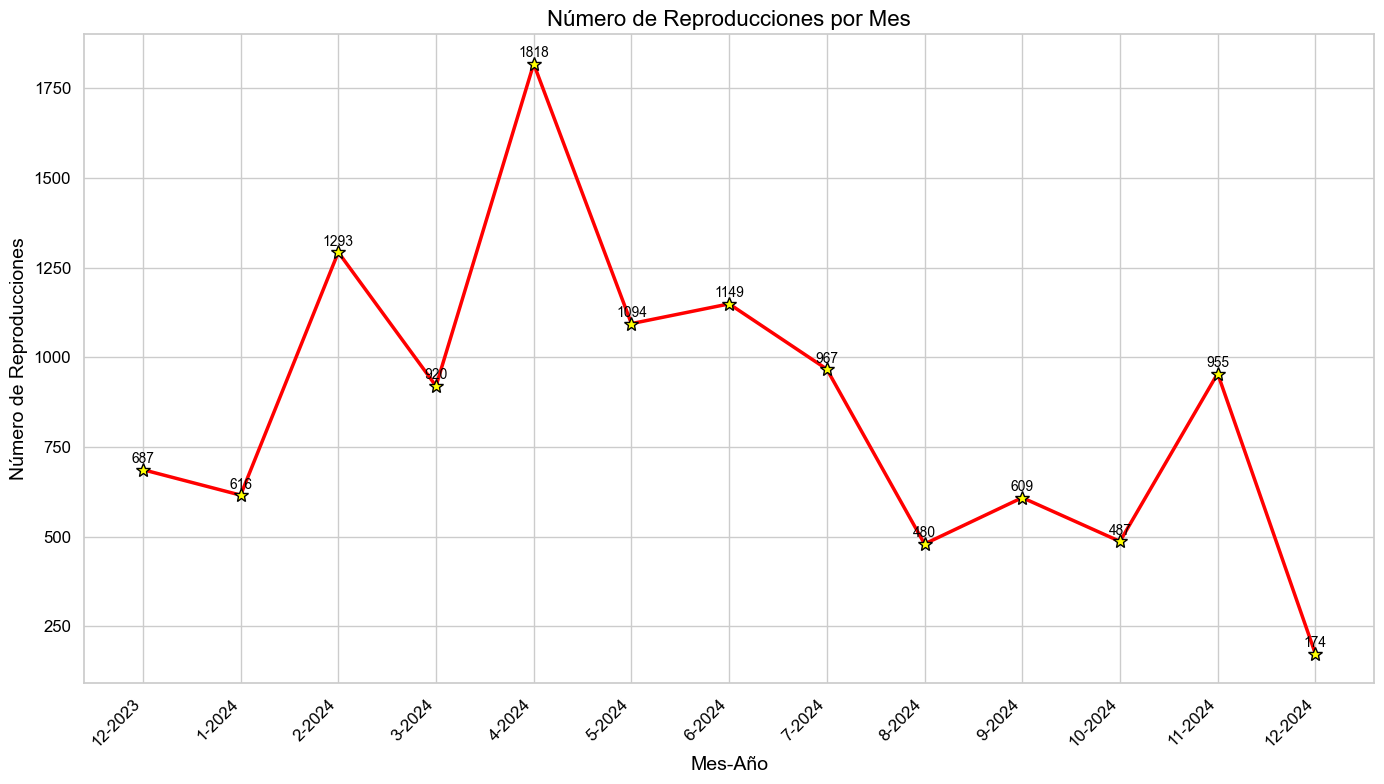

In [232]:
plt.figure(figsize=(14, 8))
# Plot estético con líneas rojas, textos negros y puntos en formato de estrella amarilla con contorno negro más fino
sns.lineplot(data=reproducciones_mensuales, x='mes_anio', y='reproducciones', marker='*', color='red', linewidth=2.5, markersize=10, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='black')
plt.title('Número de Reproducciones por Mes', fontsize=16, color='black')
plt.xlabel('Mes-Año', fontsize=14, color='black')
plt.ylabel('Número de Reproducciones', fontsize=14, color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')

# Añadir etiquetas encima de cada punto, subiendo unos píxeles
for idx, row in reproducciones_mensuales.iterrows():
    plt.text(row['mes_anio'], row['reproducciones'] + 10, str(row['reproducciones']), color='black', ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


In [233]:
# 6. Canciones Más Saltadas
df_saltadas = df[df['saltada'] == True]
stats_saltadas = df_saltadas.groupby(['nombre_cancion', 'artista'], as_index=False).agg(
    saltos=('uri_cancion', 'count')
).sort_values('saltos', ascending=False).head(10)

print("\nTop 10 canciones más saltadas:")
stats_saltadas



Top 10 canciones más saltadas:


,nombre_cancion,artista,saltos
915,Ódiame,SAIKO,20
582,Otro Trago - Remix,Sech,20
479,Mamichula - con Nicki Nicole,Trueno,19
886,lady madrizZz,céro,18
567,NÚMERO TELEFÓNICO,SAIKO,18
399,LUNA,Feid,18
201,DURO,Quevedo,18
825,Una Vez,Bad Bunny,18
873,algo así (remix),paopao,17
11,2010,Mora,16


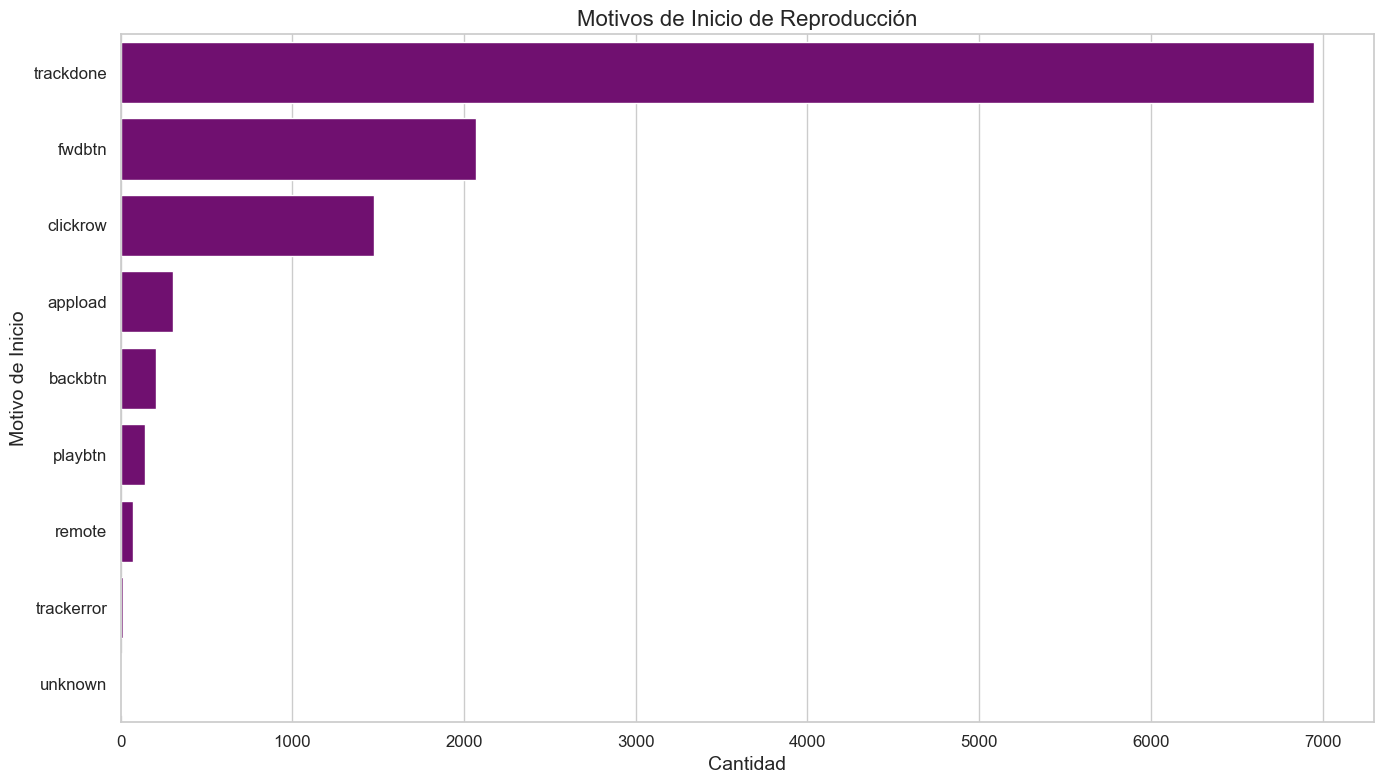

In [234]:

# 7. Motivos de Inicio
motivos_inicio = df['motivo_inicio'].value_counts().reset_index()
motivos_inicio.columns = ['motivo_inicio', 'cantidad']
plt.figure(figsize=(14, 8))
sns.barplot(data=motivos_inicio, x='cantidad', y='motivo_inicio', color='purple')
plt.title('Motivos de Inicio de Reproducción', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Motivo de Inicio', fontsize=14)
plt.tight_layout()
plt.show()

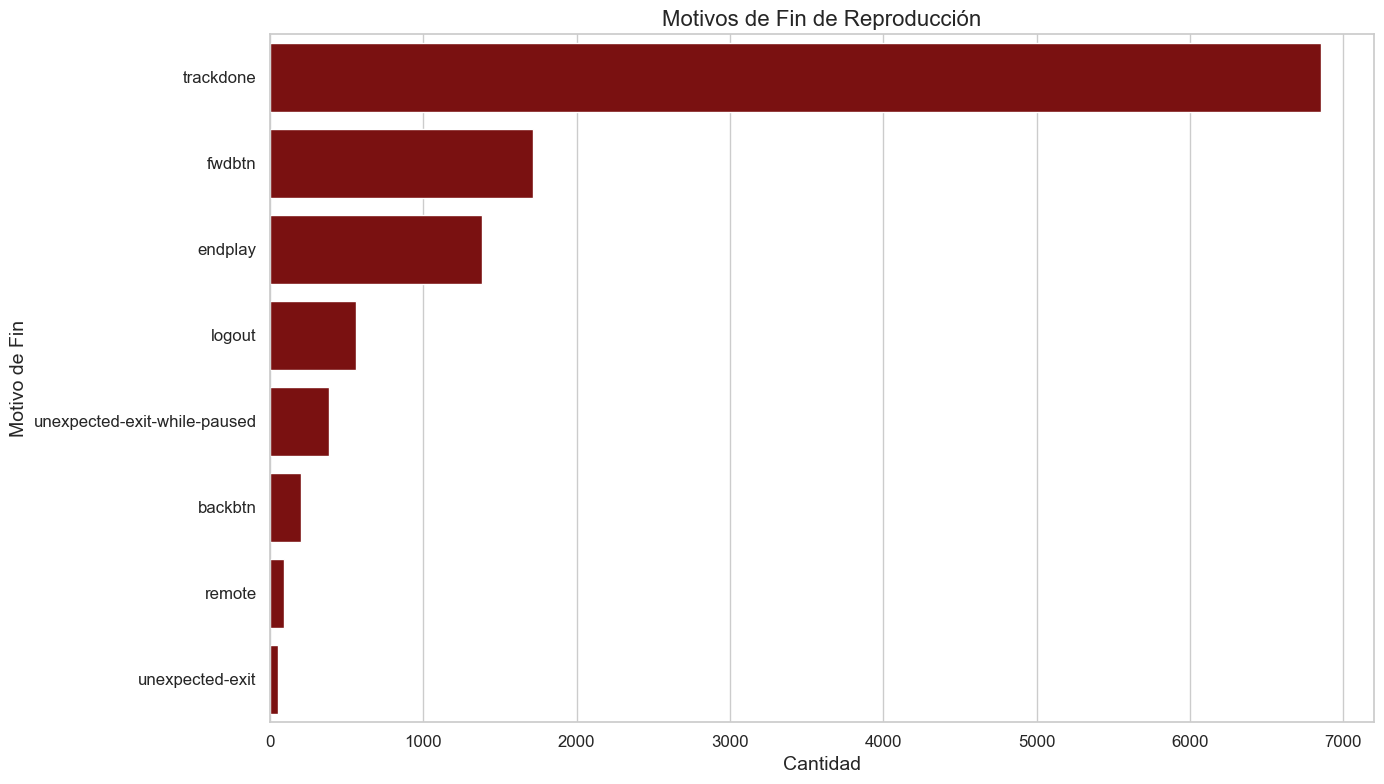

In [235]:

# 8. Motivos de Fin
motivos_fin = df['motivo_fin'].value_counts().reset_index()
motivos_fin.columns = ['motivo_fin', 'cantidad']
plt.figure(figsize=(14, 8))
sns.barplot(data=motivos_fin, x='cantidad', y='motivo_fin', color='darkred')
plt.title('Motivos de Fin de Reproducción', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Motivo de Fin', fontsize=14)
plt.tight_layout()
plt.show()


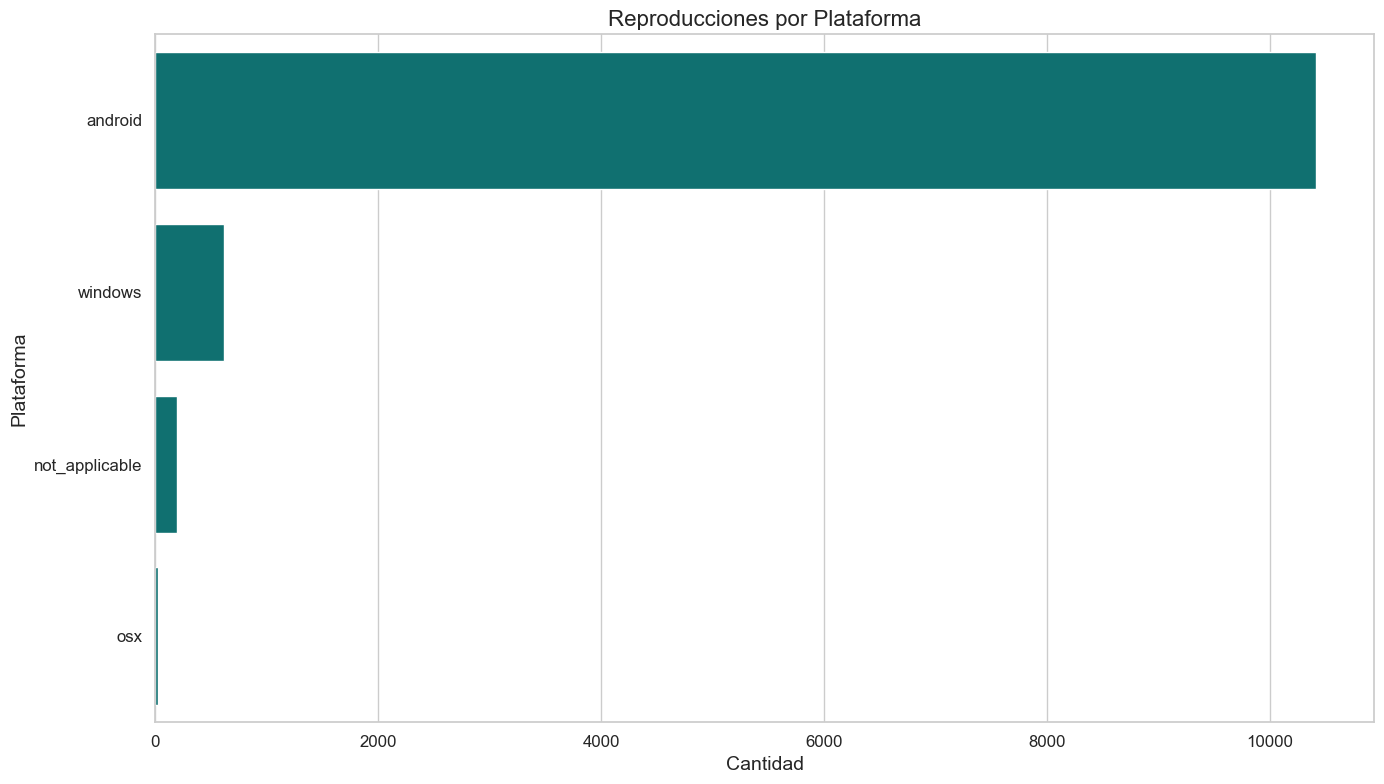

In [236]:
# 9. Reproducciones por Plataforma
plataformas = df['plataforma'].value_counts().reset_index()
plataformas.columns = ['plataforma', 'cantidad']
plt.figure(figsize=(14, 8))
sns.barplot(data=plataformas, x='cantidad', y='plataforma', color='teal')
plt.title('Reproducciones por Plataforma', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Plataforma', fontsize=14)
plt.tight_layout()
plt.show()

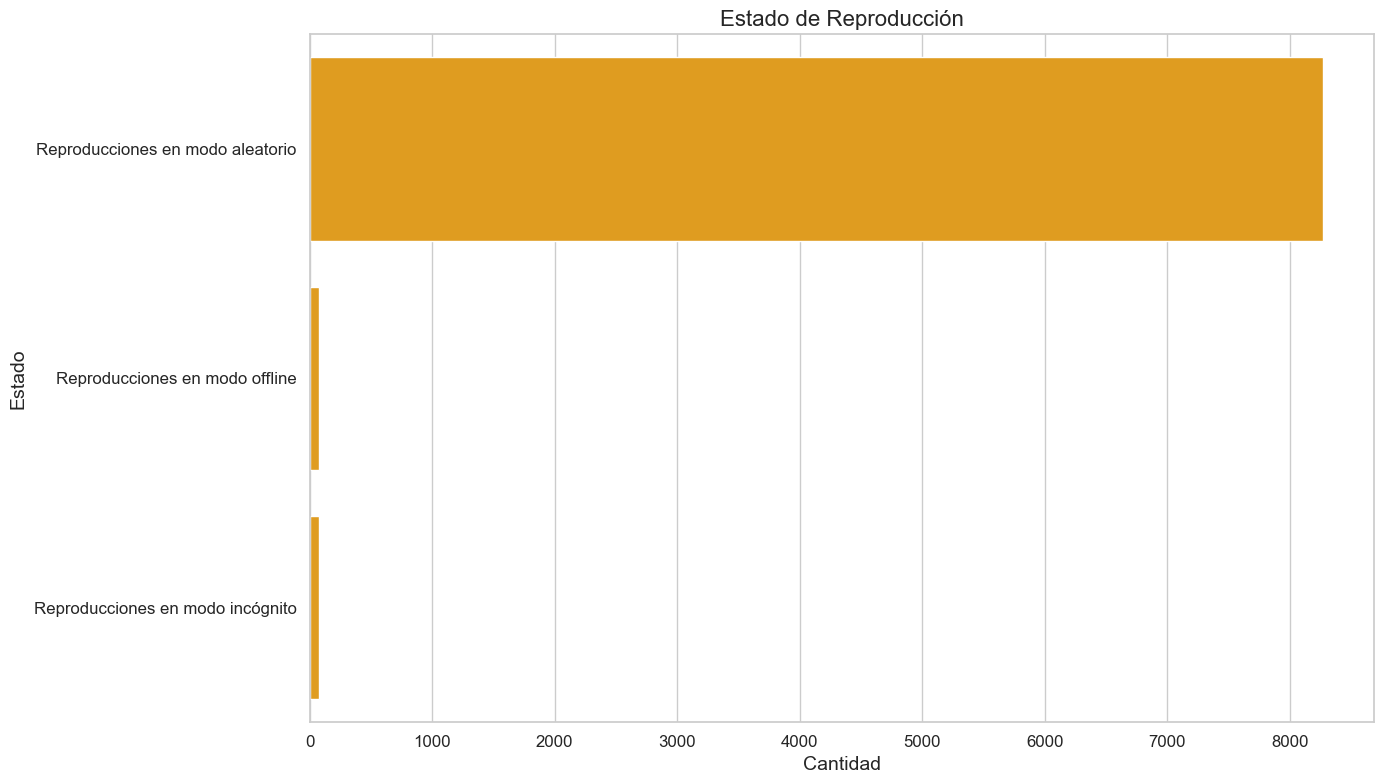

In [237]:

# 10. Estados de Reproducción
estados = {
    'modo_aleatorio': 'Reproducciones en modo aleatorio',
    'modo_offline': 'Reproducciones en modo offline',
    'modo_incognito': 'Reproducciones en modo incógnito'
}
df_estados = pd.DataFrame({
    'estado': list(estados.values()),
    'cantidad': [df[col].sum() for col in estados.keys()]
})

plt.figure(figsize=(14, 8))
sns.barplot(data=df_estados, x='cantidad', y='estado', color='orange')
plt.title('Estado de Reproducción', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Estado', fontsize=14)
plt.tight_layout()
plt.show()


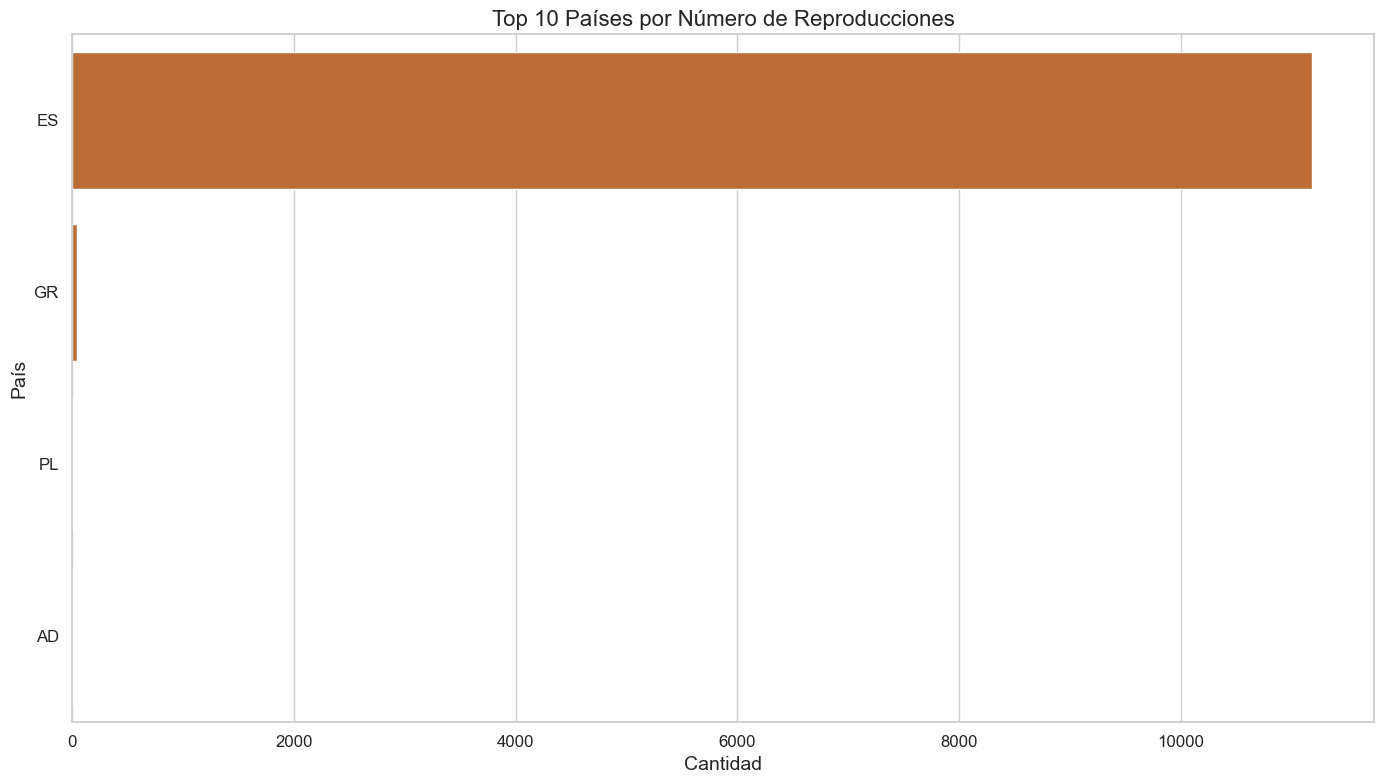

In [238]:

# 11. Países con más reproducciones
paises = df['pais_conexion'].value_counts().reset_index()
paises.columns = ['pais', 'cantidad']
plt.figure(figsize=(14, 8))
sns.barplot(data=paises.head(10), x='cantidad', y='pais', color='chocolate')
plt.title('Top 10 Países por Número de Reproducciones', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.tight_layout()
plt.show()


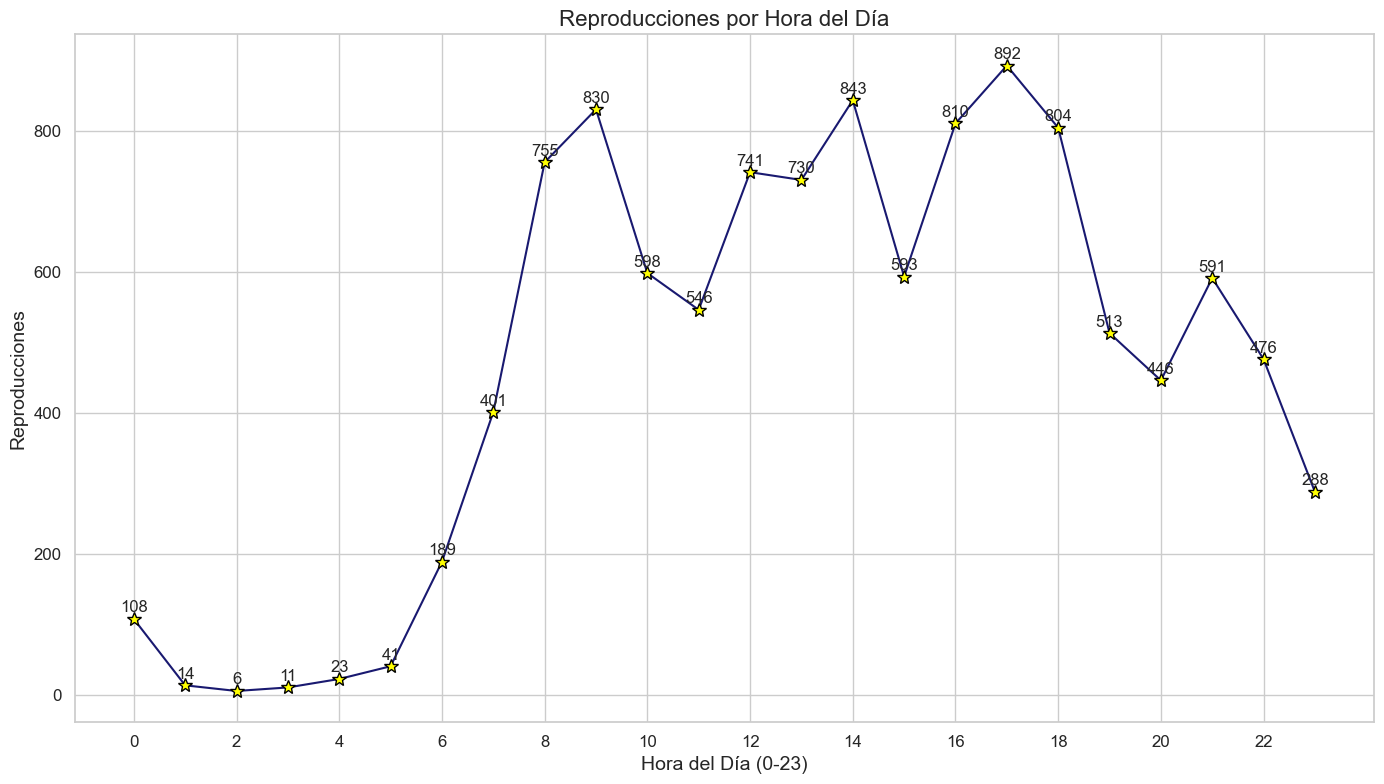

In [239]:
# --- Nuevas Estadísticas Avanzadas ---
# 12. Reproducciones por Hora del Día
df['hora'] = df['marca_tiempo'].dt.hour
reproducciones_por_hora = df.groupby('hora').size().reset_index(name='reproducciones')
plt.figure(figsize=(14, 8))
sns.lineplot(data=reproducciones_por_hora, x='hora', y='reproducciones', marker='*', color='midnightblue', markersize=10, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='black')
plt.title('Reproducciones por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día (0-23)', fontsize=14)
plt.ylabel('Reproducciones', fontsize=14)
plt.xticks(ticks=np.arange(0, 24, 2))

for idx, row in reproducciones_por_hora.iterrows():
    plt.text(row['hora'], row['reproducciones'] + 5, str(row['reproducciones']), ha='center', va='bottom')
plt.tight_layout()
plt.show()


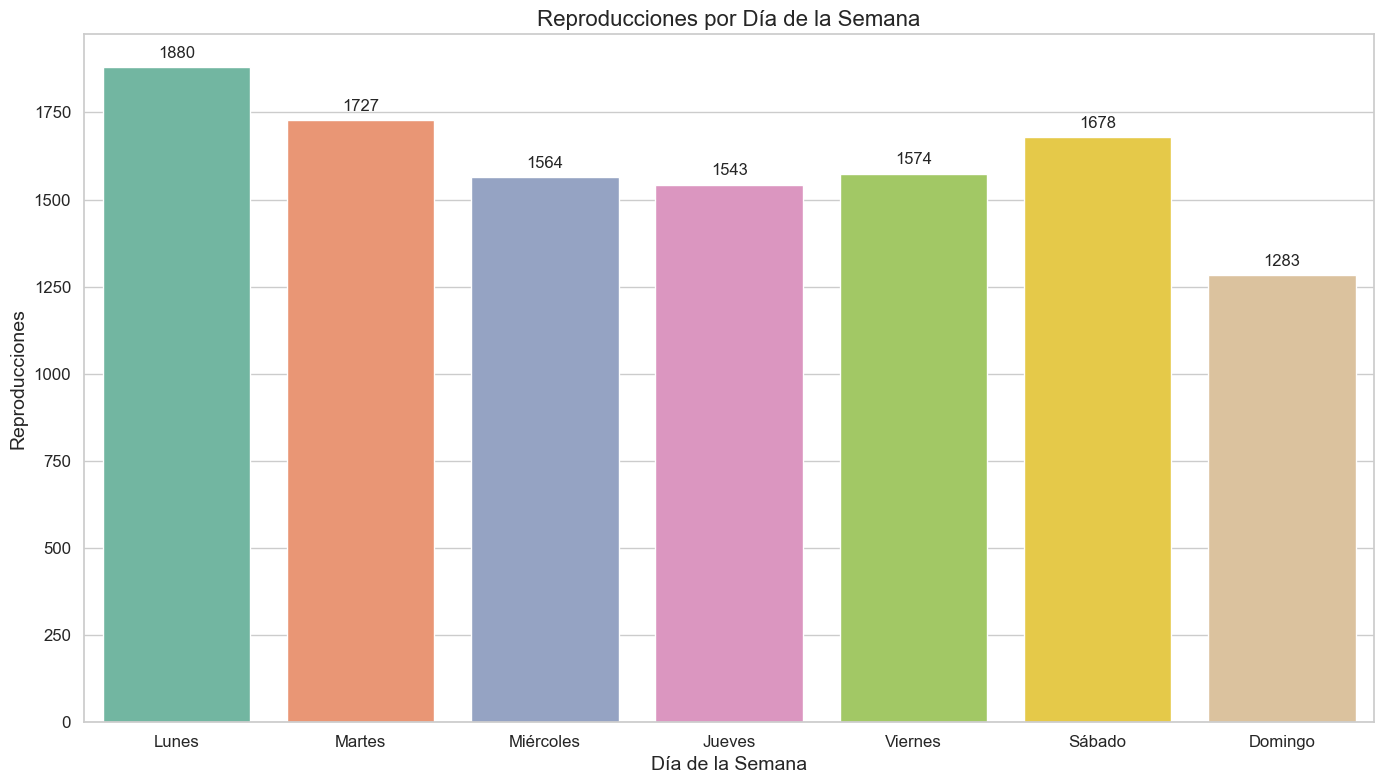

In [240]:
# 13. Reproducciones por Día de la Semana
# Mapeamos el número de día a nombre en español (sin usar locale)
# 0: Lunes, 6: Domingo
dias_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['dia_semana'] = df['marca_tiempo'].dt.weekday.map(dias_map)
# Ordenar días
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
reproducciones_por_dia = df.groupby('dia_semana').size().reset_index(name='reproducciones')
# Convertimos dia_semana a categoría para asegurar el orden correcto
reproducciones_por_dia['dia_semana'] = pd.Categorical(reproducciones_por_dia['dia_semana'], categories=orden_dias, ordered=True)
reproducciones_por_dia.sort_values('dia_semana', inplace=True)

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=reproducciones_por_dia, x='dia_semana', y='reproducciones', hue='dia_semana', palette='Set2', dodge=False, legend=False)
plt.title('Reproducciones por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Reproducciones', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

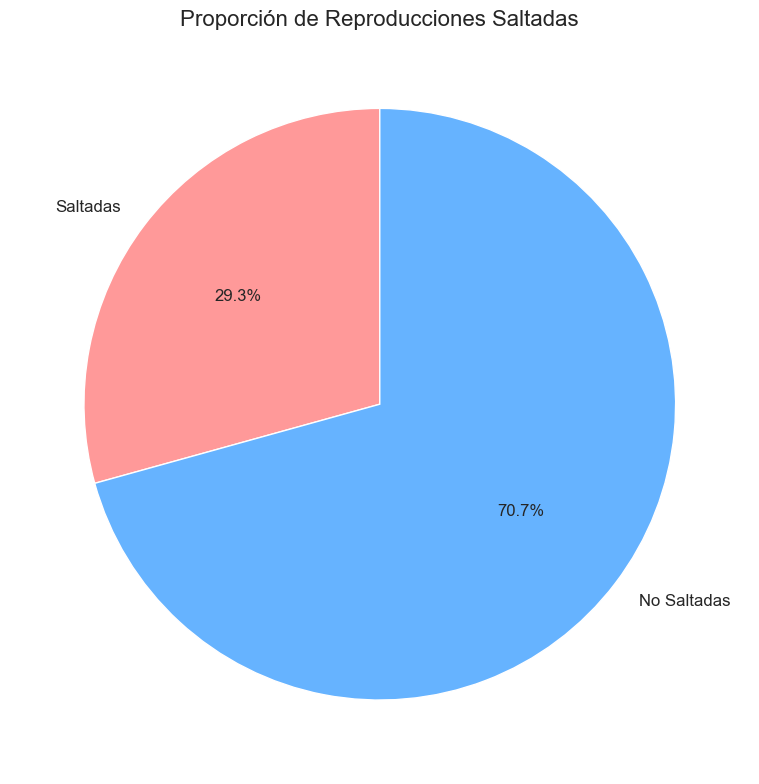

In [241]:
# 14. Proporción de Reproducciones Saltadas vs No Saltadas
total_reproducciones = len(df)
total_saltadas = df['saltada'].sum()
total_no_saltadas = total_reproducciones - total_saltadas

plt.figure(figsize=(8, 8))
plt.pie([total_saltadas, total_no_saltadas],
        labels=['Saltadas', 'No Saltadas'],
        autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proporción de Reproducciones Saltadas', fontsize=16)
plt.tight_layout()
plt.show()

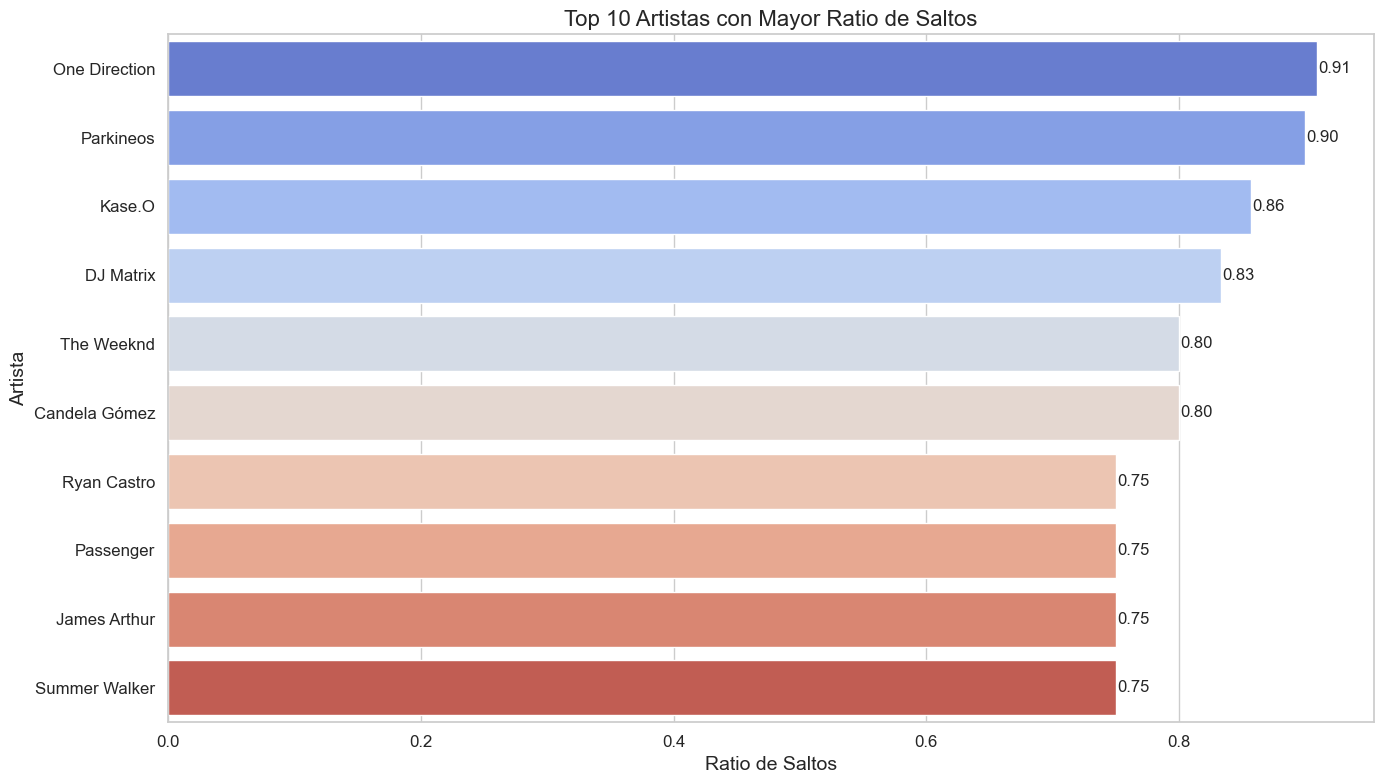

In [242]:
# 15. Ratio de Saltos por Artista
# Filtrar artistas con ratio de saltos menor a 1
artistas_saltos_filtrados = artistas_saltos[artistas_saltos['ratio_saltos'] < 1]

# Obtener los 10 artistas con más saltos, ordenados por ratio de saltos de mayor a menor
artistas_saltos_top = artistas_saltos_filtrados.sort_values('ratio_saltos', ascending=False).head(10).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=artistas_saltos_top, x='ratio_saltos', y='artista', hue='artista', palette='coolwarm', legend=False)
plt.title('Top 10 Artistas con Mayor Ratio de Saltos', fontsize=16)
plt.xlabel('Ratio de Saltos', fontsize=14)
plt.ylabel('Artista', fontsize=14)
for idx, row in artistas_saltos_top.iterrows():
    plt.text(row['ratio_saltos'] + 0.001, idx, f"{row['ratio_saltos']:.2f}", va='center')
plt.tight_layout()
plt.show()



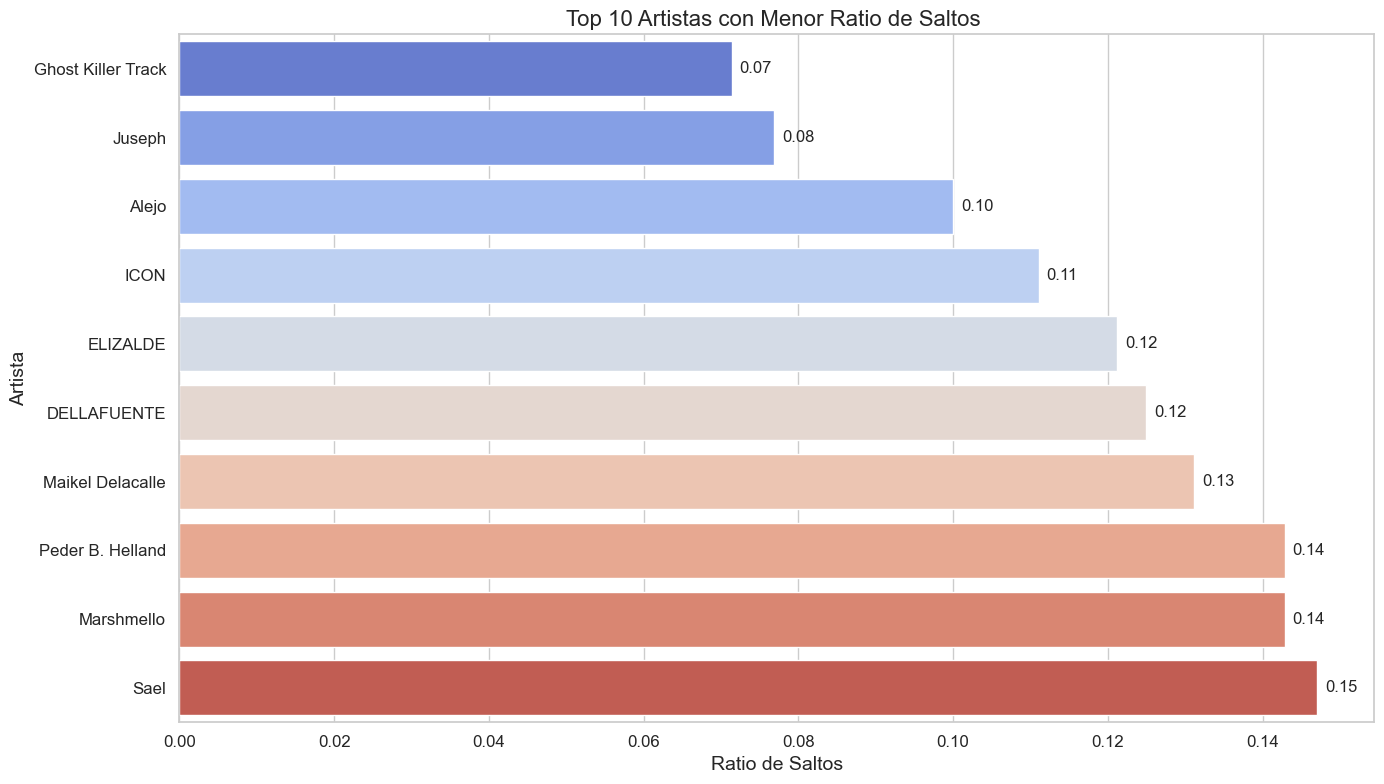

In [243]:
# Obtener los 10 artistas con menos saltos, ordenados por ratio de saltos de menor a mayor, excluyendo los de ratio 0
artistas_menos_saltos_top = artistas_saltos_filtrados[artistas_saltos_filtrados['ratio_saltos'] > 0].sort_values('ratio_saltos', ascending=True).head(10).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=artistas_menos_saltos_top, x='ratio_saltos', y='artista', hue='artista', palette='coolwarm', legend=False)
plt.title('Top 10 Artistas con Menor Ratio de Saltos ', fontsize=16)
plt.xlabel('Ratio de Saltos', fontsize=14)
plt.ylabel('Artista', fontsize=14)
for idx, row in artistas_menos_saltos_top.iterrows():
    plt.text(row['ratio_saltos'] + 0.001, idx, f"{row['ratio_saltos']:.2f}", va='center')
plt.tight_layout()
plt.show()